In [3]:
from tqdm import tqdm
import requests
import json
import pandas as pd
from decouple import config

# Получаем URL из .env
db_url = config("PETS_DATABASE_PATH")  # или os.environ["PETS_DATABASE_PATH"]

# Загружаем JSON по URL
print(f"Загружаем данные из {db_url}...")
response = requests.get(db_url, stream=True)
total_size = int(response.headers.get('content-length', 0))
block_size = 1024  # 1 КБ
content = b""

with tqdm(total=total_size, unit='B', unit_scale=True, desc="Скачивание файла") as pbar:
    for data in response.iter_content(block_size):
        content += data
        pbar.update(len(data))

data = json.loads(content.decode('utf-8'))

# Преобразуем в DataFrame (пример для структуры {group: [items]})
all_items = []
for group, items in tqdm(data.items(), desc="Загрузка данных", unit="группа"):
    for item in items:
        assert isinstance(group, str), f"Группа должна быть строкой, а не {type(group)}"
        item['group'] = group  # добавим группу, если нужно
        all_items.append(item)

df = pd.DataFrame(all_items)
print(df.head())

Загружаем данные из https://storage.yandexcloud.net/pet-match-s3-storage/PetMatch/db.json...


Скачивание файла: 5.37MB [00:01, 3.72MB/s]
Загрузка данных: 100%|██████████| 16/16 [00:00<00:00, 90321.49группа/s]

       id        date                                        attachments  \
0  146978  1750825800  [{'type': 'photo', 'photo': {'id': 457304568, ...   
1  146948  1750782600  [{'type': 'photo', 'photo': {'id': 457304561, ...   
2  146936  1750770632  [{'type': 'photo', 'photo': {'id': 457304558, ...   
3  146923  1750739400  [{'type': 'photo', 'photo': {'id': 457304555, ...   
4  146909  1750696200  [{'type': 'photo', 'photo': {'id': 457304550, ...   

                                           shortText  \
0  Волгоград и Волжский ищут дом для кота Тайлера...   
1  Ищем дом для Шушика - ласкового кота с непрост...   
2  У Лелика наблюдается улучшение состояния: он р...   
3  Волгоград и другие города ищут дом для кота Ку...   
4  Волгоград и Волжский ищут новый дом для кота Б...   

                                                text  \
0  Волгоград и Волжский! \nКотик Тайлер ищет дом!...   
1  Ищем дом для Шушика – ласкового кота с непрост...   
2  ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.c

In [4]:
df

,id,date,attachments,shortText,text,pet_info,group
0,146978,1750825800,"[{'type': 'photo', 'photo': {'id': 457304568, ...",Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,"{'age': {'years': 4, 'months': 0, 'days': 0}, ...",domikvlg
1,146948,1750782600,"[{'type': 'photo', 'photo': {'id': 457304561, ...",Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,"{'age': {'years': 4, 'months': 0, 'days': 0}, ...",domikvlg
2,146936,1750770632,"[{'type': 'photo', 'photo': {'id': 457304558, ...",У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,"{'age': {'years': 0, 'months': 0, 'days': 0}, ...",domikvlg
3,146923,1750739400,"[{'type': 'photo', 'photo': {'id': 457304555, ...",Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,"{'age': {'years': 3, 'months': 0, 'days': 0}, ...",domikvlg
4,146909,1750696200,"[{'type': 'photo', 'photo': {'id': 457304550, ...",Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,"{'age': {'years': 4, 'months': 0, 'days': 0}, ...",domikvlg
...,...,...,...,...,...,...,...
777,34208,1740755061,"[{'type': 'video', 'photo': None}]","Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,{},mospriut
778,34049,1740650790,"[{'type': 'photo', 'photo': {'id': 457242406, ...",Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,"{'age': {'years': 1, 'months': 0, 'days': 0}, ...",mospriut
779,33823,1740492178,"[{'type': 'photo', 'photo': {'id': 457242402, ...","Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...","{'age': {'years': 0, 'months': 10, 'days': 0},...",mospriut
780,33622,1740401001,"[{'type': 'video', 'photo': None}]","Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...","{'age': {'years': 0, 'months': 0, 'days': 0}, ...",mospriut


In [5]:
import ast
import pandas as pd

def parse_pet_info(x):
    if isinstance(x, dict):
        return x
    try:
        return ast.literal_eval(x)
    except Exception:
        return {}

# Преобразуем pet_info в dict и развернём в отдельные колонки
pet_info_df = df['pet_info'].apply(parse_pet_info).apply(pd.Series)

# Разворачиваем все вложенные dict (например, age, health)
for col in ['age', 'health', 'contact']:
    nested = pet_info_df[col].apply(pd.Series).add_prefix(f"{col}_")
    pet_info_df = pd.concat([pet_info_df.drop(columns=[col]), nested], axis=1)

# Объединяем с исходным df
df = pd.concat([df.drop(columns=['pet_info']), pet_info_df], axis=1)

In [6]:
df

,id,date,attachments,shortText,text,group,vaccinations,sterilization,temperament,name,...,age_months,age_days,age_0,health_status,health_diseases,health_vaccinations,health_0,contact_number,contact_name,contact_0
0,146978,1750825800,"[{'type': 'photo', 'photo': {'id': 457304568, ...",Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,domikvlg,True,True,"[самоуверенный, тревожный, боится людей]",Тайлер,...,0.0,0.0,NaN,здоров,[],[],NaN,8 937 719 06 08,Ева/vk.com/id_ewa,NaN
1,146948,1750782600,"[{'type': 'photo', 'photo': {'id': 457304561, ...",Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,domikvlg,True,True,"[ласковый, игривый, доверчивый]",Шушик,...,0.0,0.0,NaN,травма лапы,[],[],NaN,8 937 719 06 08,Ева/vk.com/id_ewa,NaN
2,146936,1750770632,"[{'type': 'photo', 'photo': {'id': 457304558, ...",У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,domikvlg,False,False,"[интересуется миром, хочет есть самостоятельно]",Лёлик,...,0.0,0.0,NaN,травмы,[],[],NaN,8-937-719-06-08,Ева,NaN
3,146923,1750739400,"[{'type': 'photo', 'photo': {'id': 457304555, ...",Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,domikvlg,True,True,"[контактный, игривый, стеснительный]",Кузька,...,0.0,0.0,NaN,здоров,[],[],NaN,8 937 719 06 08,Ева/vk.com/id_ewa,NaN
4,146909,1750696200,"[{'type': 'photo', 'photo': {'id': 457304550, ...",Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,domikvlg,True,True,"[спокойный, общительный, любопытный, ласковый,...",Боливар,...,0.0,0.0,NaN,здоров,[],[],NaN,8 937 719 06 08,Ева/vk.com/id_ewa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,34208,1740755061,"[{'type': 'video', 'photo': None}]","Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,mospriut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,34049,1740650790,"[{'type': 'photo', 'photo': {'id': 457242406, ...",Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,mospriut,False,False,"[дружелюбный, активный]",Ромка,...,0.0,0.0,NaN,здоров,[],[],NaN,+7(963)716-03-98,@mospriut,NaN
779,33823,1740492178,"[{'type': 'photo', 'photo': {'id': 457242402, ...","Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...",mospriut,True,True,"[дружелюбная, с кошками - неизвестно, с людьми...",Лия,...,10.0,0.0,NaN,здорова,[],[],NaN,8 (906) 712-12-44,Екатерина/@mospriut,NaN
780,33622,1740401001,"[{'type': 'video', 'photo': None}]","Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...",mospriut,True,None,"[ласковая, умная, чуткая, дружелюбная, активная]",Мила,...,0.0,0.0,NaN,здорова,[],[],NaN,+7-963-716-03-98,Лилия/@mospriut,NaN


In [7]:
df = df.drop(columns=["age_0", "health_0", "contact_0"])

In [8]:
def list_to_tuple(x):
    if isinstance(x, list):
        return tuple(x)
    return x

df = df.applymap(list_to_tuple)

In [9]:
df

,id,date,attachments,shortText,text,group,vaccinations,sterilization,temperament,name,...,owner_requirements,height,age_years,age_months,age_days,health_status,health_diseases,health_vaccinations,contact_number,contact_name
0,146978,1750825800,"({'type': 'photo', 'photo': {'id': 457304568, ...",Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,domikvlg,True,True,"(самоуверенный, тревожный, боится людей)",Тайлер,...,"(взрослые люди, квартирное содержание)",NaN,4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
1,146948,1750782600,"({'type': 'photo', 'photo': {'id': 457304561, ...",Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,domikvlg,True,True,"(ласковый, игривый, доверчивый)",Шушик,...,"(взрослые, ответственные люди, проживающие в к...",NaN,4.0,0.0,0.0,травма лапы,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
2,146936,1750770632,"({'type': 'photo', 'photo': {'id': 457304558, ...",У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,domikvlg,False,False,"(интересуется миром, хочет есть самостоятельно)",Лёлик,...,(),NaN,0.0,0.0,0.0,травмы,(),(),8-937-719-06-08,Ева
3,146923,1750739400,"({'type': 'photo', 'photo': {'id': 457304555, ...",Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,domikvlg,True,True,"(контактный, игривый, стеснительный)",Кузька,...,"(взрослые люди, квартира)",NaN,3.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
4,146909,1750696200,"({'type': 'photo', 'photo': {'id': 457304550, ...",Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,domikvlg,True,True,"(спокойный, общительный, любопытный, ласковый,...",Боливар,...,"(взрослые, ответственные люди, квартира)",NaN,4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,34208,1740755061,"({'type': 'video', 'photo': None},)","Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,mospriut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,34049,1740650790,"({'type': 'photo', 'photo': {'id': 457242406, ...",Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,mospriut,False,False,"(дружелюбный, активный)",Ромка,...,"(неизвестно,)",NaN,1.0,0.0,0.0,здоров,(),(),+7(963)716-03-98,@mospriut
779,33823,1740492178,"({'type': 'photo', 'photo': {'id': 457242402, ...","Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...",mospriut,True,True,"(дружелюбная, с кошками - неизвестно, с людьми...",Лия,...,"(не указано,)",NaN,0.0,10.0,0.0,здорова,(),(),8 (906) 712-12-44,Екатерина/@mospriut
780,33622,1740401001,"({'type': 'video', 'photo': None},)","Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...",mospriut,True,None,"(ласковая, умная, чуткая, дружелюбная, активная)",Мила,...,"(опытный, без маленьких детей)",NaN,0.0,0.0,0.0,здорова,(),(),+7-963-716-03-98,Лилия/@mospriut


In [10]:
def extract_orig_photo_urls(attachments):
    if not attachments:
        return tuple()
    return tuple(
        att['photo']['orig_photo']['url']
        for att in attachments
        if att.get('type') == 'photo'
        and 'photo' in att
        and att['photo'] is not None
        and 'orig_photo' in att['photo']
        and att['photo']['orig_photo'] is not None
        and 'url' in att['photo']['orig_photo']
    )

df['attachments'] = df['attachments'].apply(extract_orig_photo_urls)

In [11]:
df

,id,date,attachments,shortText,text,group,vaccinations,sterilization,temperament,name,...,owner_requirements,height,age_years,age_months,age_days,health_status,health_diseases,health_vaccinations,contact_number,contact_name
0,146978,1750825800,(https://sun9-45.userapi.com/s/v1/if2/42-5EnYA...,Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,domikvlg,True,True,"(самоуверенный, тревожный, боится людей)",Тайлер,...,"(взрослые люди, квартирное содержание)",NaN,4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
1,146948,1750782600,(https://sun9-80.userapi.com/s/v1/ig2/zxeTCsFm...,Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,domikvlg,True,True,"(ласковый, игривый, доверчивый)",Шушик,...,"(взрослые, ответственные люди, проживающие в к...",NaN,4.0,0.0,0.0,травма лапы,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
2,146936,1750770632,(https://sun9-32.userapi.com/s/v1/ig2/1fNOqpIb...,У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,domikvlg,False,False,"(интересуется миром, хочет есть самостоятельно)",Лёлик,...,(),NaN,0.0,0.0,0.0,травмы,(),(),8-937-719-06-08,Ева
3,146923,1750739400,(https://sun9-56.userapi.com/s/v1/if2/JNFS6UW1...,Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,domikvlg,True,True,"(контактный, игривый, стеснительный)",Кузька,...,"(взрослые люди, квартира)",NaN,3.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
4,146909,1750696200,(https://sun9-43.userapi.com/s/v1/if2/XAuAQdZJ...,Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,domikvlg,True,True,"(спокойный, общительный, любопытный, ласковый,...",Боливар,...,"(взрослые, ответственные люди, квартира)",NaN,4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,34208,1740755061,(),"Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,mospriut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,34049,1740650790,(https://sun9-55.userapi.com/s/v1/ig2/iFL0TZgG...,Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,mospriut,False,False,"(дружелюбный, активный)",Ромка,...,"(неизвестно,)",NaN,1.0,0.0,0.0,здоров,(),(),+7(963)716-03-98,@mospriut
779,33823,1740492178,(https://sun9-38.userapi.com/s/v1/ig2/Ff4f8N9T...,"Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...",mospriut,True,True,"(дружелюбная, с кошками - неизвестно, с людьми...",Лия,...,"(не указано,)",NaN,0.0,10.0,0.0,здорова,(),(),8 (906) 712-12-44,Екатерина/@mospriut
780,33622,1740401001,(),"Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...",mospriut,True,None,"(ласковая, умная, чуткая, дружелюбная, активная)",Мила,...,"(опытный, без маленьких детей)",NaN,0.0,0.0,0.0,здорова,(),(),+7-963-716-03-98,Лилия/@mospriut


In [12]:
df = df.drop(columns=["height"])

In [13]:
df.columns

Index(['id', 'date', 'attachments', 'shortText', 'text', 'group',
       'vaccinations', 'sterilization', 'temperament', 'name', 'birth_place',
       'grow_up_with', 'previous_owner', 'owner_requirements', 'age_years',
       'age_months', 'age_days', 'health_status', 'health_diseases',
       'health_vaccinations', 'contact_number', 'contact_name'],
      dtype='object')

In [14]:
for col in df.columns:
    non_null_count = df[col].notnull().sum()
    unique_values = df[col].dropna().unique()
    
    print(f"Столбец: {col}")
    print(f"  Непустых значений: {non_null_count}")
    print(f"  Уникальные значения ({len(unique_values)}): {unique_values[:10]}")
    if len(unique_values) > 10:
        print("  ...")
    print("-" * 60)

Столбец: id
  Непустых значений: 782
  Уникальные значения (780): [146978 146948 146936 146923 146909 146888 146839 146820 146804 146789]
  ...
------------------------------------------------------------
Столбец: date
  Непустых значений: 782
  Уникальные значения (782): [1750825800 1750782600 1750770632 1750739400 1750696200 1750653000
 1750568400 1750523400 1750482000 1750437000]
  ...
------------------------------------------------------------
Столбец: attachments
  Непустых значений: 782
  Уникальные значения (599): [('https://sun9-45.userapi.com/s/v1/if2/42-5EnYAyNnPWQa8loCvJWjO51McvKWkWjDs1MtPyW15ZL92pNPSV9qk6q59um1f7IuGbyuKsitDRoEtCPb1QrDN.jpg?quality=96&as=32x21,48x32,72x48,108x72,160x107,240x160,360x240,480x320,540x360,640x427,720x480,1080x720,1280x853,1440x960,2560x1707&from=bu', 'https://sun9-30.userapi.com/s/v1/if2/KH34qF-nfLZ3G1bDPbp8OKrpzu3sS_5eUpKsihlp3FpBWBlMS6aZa7_8UCAwc3xxhJU6FB4ZYhfTgy_4Rsdry9dF.jpg?quality=96&as=32x21,48x32,72x48,108x72,160x107,240x160,360x240,480

In [15]:
df["group"]

0      domikvlg
1      domikvlg
2      domikvlg
3      domikvlg
4      domikvlg
         ...   
777    mospriut
778    mospriut
779    mospriut
780    mospriut
781    mospriut
Name: group, Length: 782, dtype: object

In [16]:
df

,id,date,attachments,shortText,text,group,vaccinations,sterilization,temperament,name,...,previous_owner,owner_requirements,age_years,age_months,age_days,health_status,health_diseases,health_vaccinations,contact_number,contact_name
0,146978,1750825800,(https://sun9-45.userapi.com/s/v1/if2/42-5EnYA...,Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,domikvlg,True,True,"(самоуверенный, тревожный, боится людей)",Тайлер,...,неизвестно,"(взрослые люди, квартирное содержание)",4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
1,146948,1750782600,(https://sun9-80.userapi.com/s/v1/ig2/zxeTCsFm...,Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,domikvlg,True,True,"(ласковый, игривый, доверчивый)",Шушик,...,неизвестно,"(взрослые, ответственные люди, проживающие в к...",4.0,0.0,0.0,травма лапы,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
2,146936,1750770632,(https://sun9-32.userapi.com/s/v1/ig2/1fNOqpIb...,У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,domikvlg,False,False,"(интересуется миром, хочет есть самостоятельно)",Лёлик,...,неизвестно,(),0.0,0.0,0.0,травмы,(),(),8-937-719-06-08,Ева
3,146923,1750739400,(https://sun9-56.userapi.com/s/v1/if2/JNFS6UW1...,Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,domikvlg,True,True,"(контактный, игривый, стеснительный)",Кузька,...,неизвестно,"(взрослые люди, квартира)",3.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
4,146909,1750696200,(https://sun9-43.userapi.com/s/v1/if2/XAuAQdZJ...,Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,domikvlg,True,True,"(спокойный, общительный, любопытный, ласковый,...",Боливар,...,неизвестно,"(взрослые, ответственные люди, квартира)",4.0,0.0,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,34208,1740755061,(),"Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,mospriut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,34049,1740650790,(https://sun9-55.userapi.com/s/v1/ig2/iFL0TZgG...,Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,mospriut,False,False,"(дружелюбный, активный)",Ромка,...,неизвестно,"(неизвестно,)",1.0,0.0,0.0,здоров,(),(),+7(963)716-03-98,@mospriut
779,33823,1740492178,(https://sun9-38.userapi.com/s/v1/ig2/Ff4f8N9T...,"Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...",mospriut,True,True,"(дружелюбная, с кошками - неизвестно, с людьми...",Лия,...,неизвестно,"(не указано,)",0.0,10.0,0.0,здорова,(),(),8 (906) 712-12-44,Екатерина/@mospriut
780,33622,1740401001,(),"Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...",mospriut,True,None,"(ласковая, умная, чуткая, дружелюбная, активная)",Мила,...,человек,"(опытный, без маленьких детей)",0.0,0.0,0.0,здорова,(),(),+7-963-716-03-98,Лилия/@mospriut


In [32]:
df["health_status"].unique()

array(['здоров', 'травма лапы', 'травмы', 'здорова', 'средней тяжести',
       'носит вирус лейкоза кошек (неактивная форма)',
       'лечился от панкреатита и лейкоза', 'болен',
       'проблемы с кишечником', 'больна',
       'хронические заболевания внутренних органов',
       'нуждается в специальном питании (уринари)', 'носитель ВИК и ВЛК',
       'оптимистичный прогноз после лечения ожога',
       'проблемы со здоровьем', 'требует ухода за кожей',
       'эндокринологическое заболевание', 'склонна к аллергии',
       'болела ранее', 'стресс', 'инвалидность (потеря глаза)',
       'тяжело больна', 'здоровы', 'в реанимации',
       'требуется лечение ран', 'диагноз', 'требует лечения',
       'истощенный', 'нет зубов', 'нет глаз', nan, 'больная',
       'требуется лечение'], dtype=object)

In [33]:
unique_temperaments = set()
for t in df['temperament'].dropna():
    unique_temperaments.update(t)

print(*unique_temperaments, sep='\n')

любящая главенство
знает команду сидеть
требует внимания и общения
большой
мягкий
обладает навыками дрессировки
скромная
независимость
хулиганистый
перестает тянуть
необщительная
шустрая
любит детей
комфортный
с характером
настороженная с людьми
грызет все
быстро адаптирующаяся
миролюбивая
неконтактная
социальные
простая
обожает внимание и общение
человекоориентированные
крепкие
немного непослушный
диванный компаньон
контактный
держалась кучкой
боится всего и вся
игривая
молода
без агрессии
ладит со всеми
играет сама с собой
ненавязчивая
настороженно относится к другим собакам
интересуется миром
дисциплинированный
бойкая
ориентированный на человека
душевный
верный друг
тактильная
немного робкая
лидерский
капризничает
понимающий
психически устойчивый
строгая
благодарно целует за спасение
командный
доверчивый
боязливый
доброжелательный
жизнелюбивый
бегает
привязывается к людям
обожает компанию сородичей
раскрывается как котенок
обожает игрушки
легко находит общий язык с другими животными

In [24]:
df['temperament'] = df['temperament'].apply(lambda x: x if isinstance(x, tuple) else ())
df['owner_requirements'] = df['owner_requirements'].apply(lambda x: x if isinstance(x, tuple) else ())

In [35]:
from sentence_transformers import SentenceTransformer
import numpy as np

# 1. Загружаем модель (один раз)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# 2. Функция для получения эмбеддинга одного животного
def generate_embedding(tuple_data):
    if not tuple_data:
        return np.zeros(model.get_sentence_embedding_dimension())
    # temps — кортеж или список строк
    vectors = model.encode(list(tuple_data))
    return np.mean(vectors, axis=0)

# Функция для получения эмбеддинга здоровья
def health_status_embedding(text):
    if not text or (isinstance(text, float) and np.isnan(text)):
        return np.zeros(model.get_sentence_embedding_dimension())
    return model.encode(str(text))

# 3. Применяем к DataFrame
df['temperament_vector'] = df['temperament'].apply(generate_embedding)
df['owner_requirements_vector'] = df['owner_requirements'].apply(generate_embedding)
df['health_status_vector'] = df['health_status'].apply(health_status_embedding)

In [36]:
df

,id,date,attachments,shortText,text,group,vaccinations,sterilization,temperament,name,...,age_days,health_status,health_diseases,health_vaccinations,contact_number,contact_name,temperament_vector,owner_requirements_vector,cluster,health_status_vector
0,146978,1750825800,(https://sun9-45.userapi.com/s/v1/if2/42-5EnYA...,Волгоград и Волжский ищут дом для кота Тайлера...,Волгоград и Волжский! \nКотик Тайлер ищет дом!...,domikvlg,True,True,"(самоуверенный, тревожный, боится людей)",Тайлер,...,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa,"[-0.34031478, 0.54022884, -0.0076031513, -0.06...","[-0.32031688, 0.5784866, -0.119793564, -0.1896...",0,"[-0.6080307, 0.5827198, -0.67475134, -0.110569..."
1,146948,1750782600,(https://sun9-80.userapi.com/s/v1/ig2/zxeTCsFm...,Ищем дом для Шушика - ласкового кота с непрост...,Ищем дом для Шушика – ласкового кота с непрост...,domikvlg,True,True,"(ласковый, игривый, доверчивый)",Шушик,...,0.0,травма лапы,(),(),8 937 719 06 08,Ева/vk.com/id_ewa,"[-0.42918023, 0.38182828, -0.06801663, -0.1085...","[-0.35926008, 0.59547013, -0.122051336, -0.251...",0,"[-0.37510267, 0.4280633, -0.063903004, -0.0983..."
2,146936,1750770632,(https://sun9-32.userapi.com/s/v1/ig2/1fNOqpIb...,У Лелика наблюдается улучшение состояния: он р...,ЛЁЛИК_СБИТЫЙ КОТ \nПервый пост vk.com/wall-653...,domikvlg,False,False,"(интересуется миром, хочет есть самостоятельно)",Лёлик,...,0.0,травмы,(),(),8-937-719-06-08,Ева,"[-0.09094247, 0.65811837, 0.14552125, -0.11876...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,"[-0.59890485, 0.47298443, 0.025889397, 0.08452..."
3,146923,1750739400,(https://sun9-56.userapi.com/s/v1/if2/JNFS6UW1...,Волгоград и другие города ищут дом для кота Ку...,Волгоград и другие города! \nКотик Кузька ищет...,domikvlg,True,True,"(контактный, игривый, стеснительный)",Кузька,...,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa,"[-0.32425305, 0.4296943, 0.0050573274, -0.0657...","[-0.47039503, 0.60112095, -0.19331643, -0.0121...",0,"[-0.6080307, 0.5827198, -0.67475134, -0.110569..."
4,146909,1750696200,(https://sun9-43.userapi.com/s/v1/if2/XAuAQdZJ...,Волгоград и Волжский ищут новый дом для кота Б...,Волгоград и Волжский! \nИдет дом кот Боливар! ...,domikvlg,True,True,"(спокойный, общительный, любопытный, ласковый,...",Боливар,...,0.0,здоров,(),(),8 937 719 06 08,Ева/vk.com/id_ewa,"[-0.35211533, 0.39472193, -0.04033289, -0.1502...","[-0.4631145, 0.63971263, -0.22883223, -0.12518...",0,"[-0.6080307, 0.5827198, -0.67475134, -0.110569..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,34208,1740755061,(),"Брэд - 2.5-летний пес, ожидающий семью в приют...",Какая ассоциация возникает у вас при взгляде н...,mospriut,NaN,NaN,(),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
778,34049,1740650790,(https://sun9-55.userapi.com/s/v1/ig2/iFL0TZgG...,Смотрите на счастливого и улыбающегося Ромку 😍...,Смотрите какой счастливый и улыбчивый пёс Ромк...,mospriut,False,False,"(дружелюбный, активный)",Ромка,...,0.0,здоров,(),(),+7(963)716-03-98,@mospriut,"[-0.2726279, 0.49095595, -0.07208017, -0.13069...","[-0.45420614, 0.96391433, -0.35317492, -0.1744...",3,"[-0.6080307, 0.5827198, -0.67475134, -0.110569..."
779,33823,1740492178,(https://sun9-38.userapi.com/s/v1/ig2/Ff4f8N9T...,"Познакомьтесь с Лией, милой и очаровательной с...","Пoзнакoмьтecь c Лией — мaленькой, но невeрoятн...",mospriut,True,True,"(дружелюбная, с кошками - неизвестно, с людьми...",Лия,...,0.0,здорова,(),(),8 (906) 712-12-44,Екатерина/@mospriut,"[-0.27588236, 0.7521849, 0.016959598, -0.02092...","[-0.26357257, 0.72224605, -0.5884548, -0.11632...",9,"[-0.5560514, 0.39499286, -0.49596918, 0.019406..."
780,33622,1740401001,(),"Знакомьтесь, Мила - собака с большим сердцем и...","Знакомьтесь, Мила – собака с огромным сердцем ...",mospriut,True,None,"(ласковая, умная, чуткая

In [27]:
df["owner_requirements_vector"].iloc[0]

array([-3.20316881e-01,  5.78486621e-01, -1.19793564e-01, -1.89609617e-01,
       -3.90649676e-01,  3.39197293e-02,  1.15292120e+00, -1.98591888e-01,
        6.18891835e-01, -2.04592794e-01,  4.29162860e-01, -5.69637358e-01,
        1.63268879e-01, -6.73072413e-02, -2.57419888e-02,  9.40920040e-02,
       -3.94821689e-02,  8.93318176e-01, -8.54170978e-01, -1.27336476e-02,
        2.07358301e-02, -2.39437699e-01,  1.60786271e-01, -3.42097849e-01,
        1.50740057e-01,  3.51020843e-02,  2.39136577e-01,  6.56073540e-03,
       -3.01469788e-02,  9.57202241e-02,  4.58091348e-01,  2.36863285e-01,
        1.32761866e-01, -7.05672055e-02,  2.11053759e-01,  3.16058218e-01,
       -6.50062144e-01,  4.24125940e-02,  5.97903848e-01,  1.00275159e-01,
        3.27313900e-01, -3.64432275e-01,  3.23437512e-01,  2.72020638e-01,
       -1.44058362e-01,  1.50019348e-01,  2.70477116e-01,  2.55833864e-01,
       -6.34216890e-02,  5.09501202e-03, -3.91751111e-01,  5.97029068e-02,
       -1.07518509e-01, -

   age_years  age_months  age_days sterilization vaccinations  temp_vec_0  \
0        4.0         0.0       0.0          True         True   -0.340315   
1        4.0         0.0       0.0          True         True   -0.429180   
2        0.0         0.0       0.0         False        False   -0.090942   
3        3.0         0.0       0.0          True         True   -0.324253   
4        4.0         0.0       0.0          True         True   -0.352115   

   temp_vec_1  temp_vec_2  temp_vec_3  temp_vec_4  ...  owner_vec_374  \
0    0.540229   -0.007603   -0.066664   -0.465685  ...       0.096645   
1    0.381828   -0.068017   -0.108520   -0.506534  ...       0.094037   
2    0.658118    0.145521   -0.118767   -0.245717  ...       0.000000   
3    0.429694    0.005057   -0.065747   -0.393507  ...       0.012192   
4    0.394722   -0.040333   -0.150204   -0.459903  ...       0.076776   

   owner_vec_375  owner_vec_376  owner_vec_377  owner_vec_378  owner_vec_379  \
0       0.138948  

/Users/timtim2379/miniconda3/envs/nn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


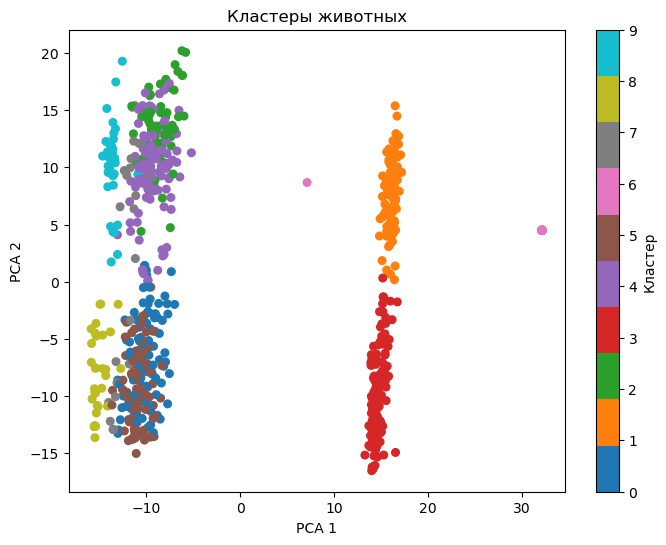

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Разложим эмбеддинги по колонкам
temp_vec_df = pd.DataFrame(df['temperament_vector'].tolist()).add_prefix('temp_vec_')
owner_vec_df = pd.DataFrame(df['owner_requirements_vector'].tolist()).add_prefix('owner_vec_')
health_vec_df = pd.DataFrame(df['health_status_vector'].tolist()).add_prefix('health_vec_')

# 2. Добавим числовые признаки (пример: возраст, стерилизация)
other_features = []
for col in ['age_years', 'age_months', 'age_days', 'sterilization', 'vaccinations']:
    if col in df.columns:
        other_features.append(col)

# 3. Соберём итоговую матрицу признаков
X = pd.concat([df[other_features], temp_vec_df, owner_vec_df], axis=1).fillna(0)
print(X.head())
print(X.shape)

# 4. Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Кластеризация (например, 4 кластера)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['cluster'] = labels

# 6. Снижаем размерность до 2D для визуализации
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# 7. Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=30)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Кластеры животных')
plt.colorbar(label='Кластер')
plt.show()

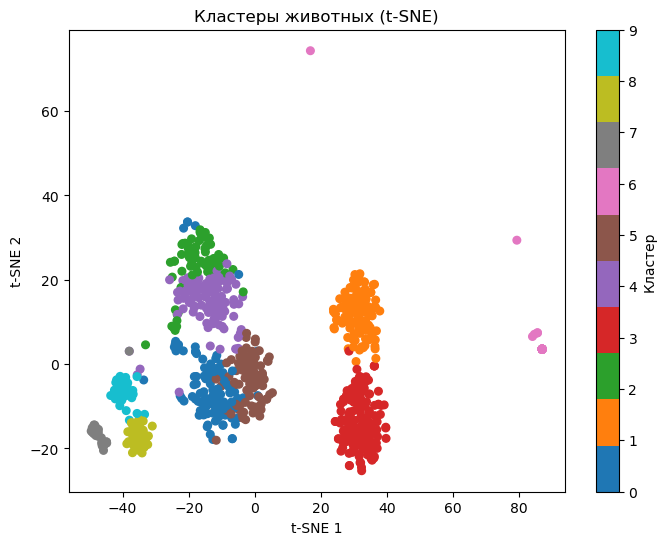

In [39]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=30)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Кластеры животных (t-SNE)')
plt.colorbar(label='Кластер')
plt.show()

In [43]:
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n=== Кластер {cluster_id + 1} ===")
    display(df[df['cluster'] == cluster_id].head(5)[['name', 'temperament', 'health_status', 'owner_requirements', 'age_years', 'sterilization', 'vaccinations']])


=== Кластер 1 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
0,Тайлер,"(самоуверенный, тревожный, боится людей)",здоров,"(взрослые люди, квартирное содержание)",4.0,True,True
1,Шушик,"(ласковый, игривый, доверчивый)",травма лапы,"(взрослые, ответственные люди, проживающие в к...",4.0,True,True
3,Кузька,"(контактный, игривый, стеснительный)",здоров,"(взрослые люди, квартира)",3.0,True,True
4,Боливар,"(спокойный, общительный, любопытный, ласковый,...",здоров,"(взрослые, ответственные люди, квартира)",4.0,True,True
5,Гавана,"(сангвиник, спокойный, дружелюбный)",здоров,"(взрослые, ответственные люди, квартира)",4.0,True,True



=== Кластер 2 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
2,Лёлик,"(интересуется миром, хочет есть самостоятельно)",травмы,(),0.0,False,False
42,Сона,"(спокойная, игривая, умная, компаньон)",здоров,(),5.0,True,True
51,Санни,"(общительная, активная, смелая)",здорова,(),0.0,True,True
54,Понги,"(ласковая, спокойная, любящая прогулки)",здорова,(),7.0,True,True
56,Лайла,"(умная, добрая, любознательная, адаптируется б...",здорова,(),0.0,None,None



=== Кластер 3 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
7,Пихта,"(социальная, дружелюбная, энергичная)",здоров,"(взрослые люди, квартира)",5.0,True,True
9,Мэй,"(недоверчивая, трусливая, активная, ленивая)",здоров,"(взрослые люди, квартира)",7.0,True,True
14,Клёпа,"(нежная, боязливая, слегка нервозная)",здоров,"(взрослые люди, в квартиру)",4.0,True,True
16,Гала,"(нежная, аккуратная, веселая, активная)",здоров,"(взрослые, ответственные люди, проживающие в к...",6.0,True,True
17,Мия,"(общительная, весёлая, дружелюбная, энергичная...",здорова,"(взрослые люди, квартира, по договору)",3.0,True,True



=== Кластер 4 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
43,Джонни,"(ласковый, кроткий, миролюбивый, спокойный, во...",здоров,(),3.0,True,True
45,Дэйв,"(ласковый, добрый, человекоориентированный, лю...",здоров,(),0.0,None,None
46,Баффи,"(добрый, веселый, контактная к людям, обожает ...",здоров,(),1.0,True,True
48,Урал,"(дружелюбный, нежный, активный)",здоров,(),2.0,True,True
50,Ветер,"(дружелюбный, нежный, подвижный, любознательный)",здоров,(),3.0,True,True



=== Кластер 5 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
6,Майка,"(игривая, общительная, лидерская)",здорова,"(взрослые, ответственные люди, проживающие в к...",3.0,True,True
8,Энни,"(самостоятельная, независимая, серьезная, игра...",здоров,"(взрослый, ответственный)",2.0,True,True
10,Люлю,"(контактная, активная, любопытная, жизнерадост...",здорова,"(взрослые, ответственные)",3.0,True,True
13,Киви,"(стеснительная, осторожная, мурлыкает при ласке)",здоров,"(взрослые, ответственные люди, квартирное соде...",4.0,True,True
15,Холзи,"(активная, игривая, настороженная с людьми)",здоров,"(взрослые, ответственные люди, живущие в кварт...",5.0,True,True



=== Кластер 6 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
26,Дюк,"(веселый, активный, общительный)",проблемы с кишечником,"(терпение, специальное питание, гигиенические ...",3.0,True,True
83,Войт,"(тихий, спокойный, неагрессивный, уживается с ...",здоров,"(терпеливый, без маленьких детей)",3.0,True,True
143,Беляш,"(добрый, открытый, контактный, учтивый, галант...",здоров,"(добрые, открытые, жизнерадостные)",5.0,True,True
145,Буррито,"(ласковый, нежный, доверчивый, добрый)",здоров,"(добрые, заботливые руки)",0.0,None,None
202,Монти,"(умный, преданный, ласковый, послушный, сильны...",здоров,"(опытный, без маленьких детей)",3.0,True,True



=== Кластер 7 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
11,Лёлик,(),средней тяжести,(),0.0,False,False
23,Лёлик,(),болен,(),0.0,True,True
95,Понги,(),здорова,(),8.0,None,None
180,Виктория,(),больна,(),0.0,False,False
197,,(),здоров,(),4.0,False,True



=== Кластер 8 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
400,Дина,"(дружелюбный, активный)",здорова,"(не указано,)",3.0,True,True
431,Лика,"(активная, доброжелательная, ориентированная н...",здорова,"(не указано,)",1.0,True,True
434,Фьючерс,"(ласковый, добродушный, энергичный, бесстрашный)",здоров,"(не указано,)",1.0,True,True
478,Гринфилд,"(веселый, позитивный, добрый, разговорчивый, к...",здоров,"(не указано,)",3.0,True,True
503,Саммер,"(ласковая, обаятельная, целовательная, нежная)",здорова,"(не указано,)",6.0,True,True



=== Кластер 9 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
273,Баста,"(сангвиник, игривый, спокойный)",здоров,"(не бабушки,)",0.0,True,True
425,Кая,"(дружелюбный, активный)",здоров,"(неизвестно,)",2.0,None,True
437,Север,"(активный, умный, дружелюбный)",здоров,"(неизвестно,)",4.0,None,True
467,Макс,"(робкий, застенчивый, скромный)",здоров,"(неизвестно,)",6.0,True,True
476,Такер,"(дружелюбный, активный, ласковый)",здоров,"(неизвестно,)",1.0,None,True



=== Кластер 10 ===


,name,temperament,health_status,owner_requirements,age_years,sterilization,vaccinations
401,Мята/Мятка,"(ласковая, смелая, преданная, благодарная)",здорова,"(неизвестно,)",3.0,None,True
403,Эльфик,"(ум, очарование, шаловливость)",здорова,"(неизвестно,)",1.0,True,True
405,Стася,"(дружелюбная, энергичная, компактных размеров)",здорова,"(неизвестно,)",0.0,None,True
448,Селин,"(обожает спать под боком у своих людей, встреч...",здорова,"(неизвестно,)",0.0,True,True
452,Эбби,"(дружелюбная, активная, кокетливая, харизматич...",здорова,"(ответственный хозяин, не на цепь)",6.0,True,True


In [ ]:
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n=== Кластер {cluster_id + 1} ===")
    cluster_df = df[df['cluster'] == cluster_id]
    
    # Темперамент: топ-5 самых частых черт
    temperament_flat = [item for sublist in cluster_df['temperament'] for item in (sublist if isinstance(sublist, (list, tuple)) else [])]
    print("Топ-5 темпераментов:", pd.Series(temperament_flat).value_counts().head(5).to_dict())
    
    # Требования к хозяину: топ-5
    owner_flat = [item for sublist in cluster_df['owner_requirements'] for item in (sublist if isinstance(sublist, (list, tuple)) else [])]
    print("Топ-5 требований к хозяину:", pd.Series(owner_flat).value_counts().head(5).to_dict())
    
    # Статус здоровья: топ-3
    print("Топ-3 статуса здоровья:", cluster_df['health_status'].value_counts().head(3).to_dict())
    
    # Пример возраста
    print("Средний возраст (лет):", cluster_df['age_years'].mean())
    print("Доля стерилизованных:", cluster_df['sterilization'].mean())
    print("Доля привитых:", cluster_df['vaccinations'].mean())


=== Кластер 1 ===
Топ-5 темпераментов: {'ласковый': 38, 'дружелюбный': 27, 'спокойный': 20, 'игривый': 20, 'добрый': 18}
Топ-5 требований к хозяину: {'взрослые': 10, 'ответственная семья': 9, 'ответственные люди': 8, 'квартира': 8, 'ответственные': 8}
Топ-3 статуса здоровья: {'здоров': 94, 'здоровы': 7, 'здорова': 2}
Средний возраст (лет): 2.7636363636363637
Доля стерилизованных: 0.8372093023255814
Доля привитых: 0.9387755102040817

=== Кластер 2 ===
Топ-5 темпераментов: {'нежная': 38, 'ласковая': 32, 'дружелюбная': 23, 'игривая': 20, 'добрая': 18}
Топ-5 требований к хозяину: {}
Топ-3 статуса здоровья: {'здорова': 93, 'здоров': 12, 'травмы': 1}
Средний возраст (лет): 1.3181818181818181
Доля стерилизованных: 0.9142857142857143
Доля привитых: 0.9302325581395349

=== Кластер 3 ===
Топ-5 темпераментов: {'нежная': 19, 'ласковая': 18, 'дружелюбная': 13, 'активная': 12, 'спокойная': 11}
Топ-5 требований к хозяину: {'взрослые люди': 11, 'квартира': 10, 'любовь': 9, 'любящая семья': 7, 'забота

In [52]:
# Пример 1: Молодая семья с ребенком, хочет ласковую и игривую кошку
user1 = {
    "age": 29,
    "family_status": "в браке",
    "has_children": True,
    "children_ages": [3],
    "income": "средний",
    "housing": "квартира",
    "experience_with_pets": "есть",
    "wishes": {
        "animal_type": "кошка",
        "temperament": ["ласковый", "игривый", "дружелюбный"],
        "health": "здоров",
        "sterilized": True,
        "vaccinated": True,
        "age_range": [1, 4]
    }
}

# Пример 2: Одинокий взрослый, без детей, хочет спокойную собаку, не против особенностей по здоровью
user2 = {
    "age": 45,
    "family_status": "одинокий",
    "has_children": False,
    "income": "выше среднего",
    "housing": "дом",
    "experience_with_pets": "большой опыт",
    "wishes": {
        "animal_type": "собака",
        "temperament": ["спокойный", "преданный"],
        "health": "не принципиально",
        "sterilized": True,
        "vaccinated": True,
        "age_range": [3, 8]
    }
}

In [67]:
def user_to_vector(user, model):
    # Темперамент и пожелания к животному
    if user["wishes"].get("temperament"):
        temp_vecs = model.encode(user["wishes"]["temperament"])
        temp_vec = np.mean(temp_vecs, axis=0)
    else:
        temp_vec = np.zeros(model.get_sentence_embedding_dimension())
    # Можно добавить owner_requirements, если есть
    if user.get("experience_with_pets"):
        owner_vecs = model.encode([user["experience_with_pets"]])
        owner_req_vec = np.mean(owner_vecs, axis=0)
    else:
        owner_req_vec = np.zeros(model.get_sentence_embedding_dimension())
    # Числовые признаки
    # Преобразуем возраст пользователя в годы, месяцы, дни (как в other_features)
    age_years = int(user["age"])
    age_months = 0
    age_days = 0
    sterilized = int(user["wishes"].get("sterilized", False))
    vaccinated = int(user["wishes"].get("vaccinated", False))

    # Собираем вектор
    vector = np.concatenate([
        [age_years, age_months, age_days, sterilized, vaccinated],  # 5 признаков
        temp_vec,
        owner_req_vec
    ])
    return vector

# Получаем вектор пользователя
user1_vector = user_to_vector(user1, model)
print("Shape user1 vector:", user1_vector.shape)
user2_vector = user_to_vector(user2, model)
print("Shape user2 vector:", user2_vector.shape)

# Масштабируем так же, как и данные животных
user1_vector_scaled = scaler.transform([user1_vector])
user2_vector_scaled = scaler.transform([user2_vector])

Shape user1 vector: (773,)
Shape user2 vector: (773,)


/Users/timtim2379/miniconda3/envs/nn/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/timtim2379/miniconda3/envs/nn/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


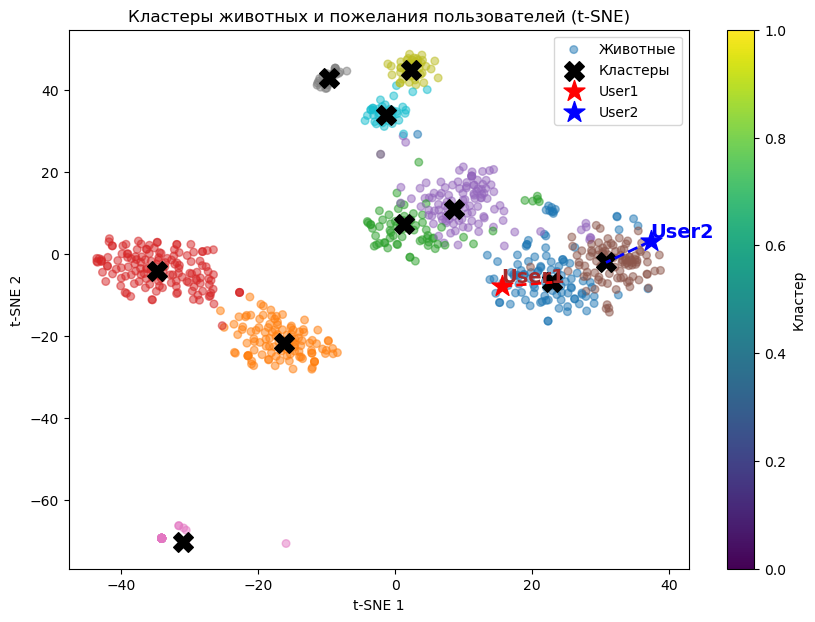

User1 ближе всего к кластеру: 1
User2 ближе всего к кластеру: 6


In [77]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Собираем все точки: животные + центры кластеров + пользователи
X_all = np.vstack([X_scaled, kmeans.cluster_centers_, user1_vector_scaled, user2_vector_scaled])
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_2d_all = tsne.fit_transform(X_all)

n_animals = X_scaled.shape[0]
n_clusters = kmeans.n_clusters

X_2d = X_2d_all[:n_animals]
centers_2d = X_2d_all[n_animals:n_animals+n_clusters]
user1_2d = X_2d_all[-2]
user2_2d = X_2d_all[-1]

plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', s=30, alpha=0.5, label='Животные')
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], color='black', marker='X', s=200, label='Кластеры')
plt.scatter(user1_2d[0], user1_2d[1], color='red', marker='*', s=250, label='User1')
plt.scatter(user2_2d[0], user2_2d[1], color='blue', marker='*', s=250, label='User2')

# Линии до центров кластеров
user1_cluster = kmeans.predict(user1_vector_scaled)[0]
user2_cluster = kmeans.predict(user2_vector_scaled)[0]
plt.plot([user1_2d[0], centers_2d[user1_cluster, 0]],
         [user1_2d[1], centers_2d[user1_cluster, 1]],
         color='red', linestyle='--', linewidth=2)
plt.plot([user2_2d[0], centers_2d[user2_cluster, 0]],
         [user2_2d[1], centers_2d[user2_cluster, 1]],
         color='blue', linestyle='--', linewidth=2)

plt.text(user1_2d[0], user1_2d[1], "User1", fontsize=14, color='brown', weight='bold', ha='left', va='bottom')
plt.text(user2_2d[0], user2_2d[1], "User2", fontsize=14, color='blue', weight='bold', ha='left', va='bottom')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Кластеры животных и пожелания пользователей (t-SNE)')
plt.colorbar(label='Кластер')
plt.legend()
plt.show()

print(f"User1 ближе всего к кластеру: {user1_cluster + 1}")
print(f"User2 ближе всего к кластеру: {user2_cluster + 1}")